In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [3]:
#get all controls
control_df = df.query('group == "control"')

In [4]:
#get ctr for control groups unique users
control_ctr = control_df.query("action == 'click'").id.nunique()/control_df.query('action == "view"').id.nunique()

In [5]:
#get all of the experiments and the ctr for the unique users in the experiment
experiment_df = df.query('group == "experiment"')
experiment_ctr = experiment_df.query("action == 'click'").id.nunique()/experiment_df.query('action == "view"').id.nunique()

In [6]:
#find the observed difference betwee the two
#a positive number would suggest that we reject the null hypoth
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [8]:
#next we bootsrtap a our data to see if this holds true over the data we have.
diffs = []
for n in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_samp = b_samp.query("group == 'control'")
    experiment_samp = b_samp.query("group == 'experiment'")
    control_ctr = control_samp.query('action == "click"').id.nunique()/control_samp.query("action == 'view'").id.nunique()
    experiment_ctr = experiment_samp.query('action == "click"').id.nunique()/experiment_samp.query("action == 'view'").id.nunique()
    diffs.append(experiment_ctr - control_ctr)


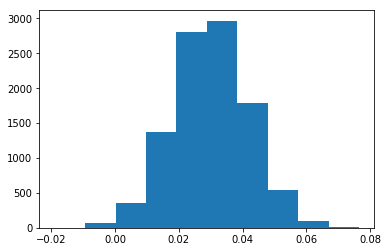

In [9]:
plt.hist(diffs);

In [10]:
#Then we need to check if this against the null using 0 as our mean
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

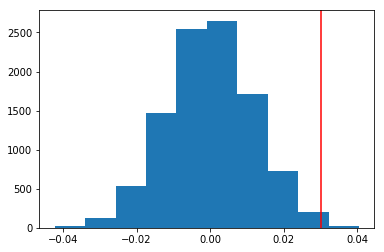

In [12]:
#here we can see that our observed difference is above the 0
#but we need to calculate the pvalue
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [13]:
#since our alterative was that the new page was better
#we can just find the meant all of the values above the obs_diff 
#indicating that we should reject the null
(null_vals > obs_diff).mean()

0.0051999999999999998